In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
#### Asisting configuration
sys.path.append("..")

In [4]:
sys.version

'3.7.4 (default, Sep 22 2020, 11:44:10) \n[Clang 11.0.3 (clang-1103.0.32.62)]'

In [5]:
pd.set_option('display.max_rows', 200)

In [8]:
df = pd.read_csv("../data/ds_challenge_apr2021.csv")

In [9]:
colores = ['#38A6A5','#99C935','#EDAD08','#ee4d5b', '#4169e1', '#00FFBF','#1C77A3FF']

In [10]:
df = df.rename(columns={'ID_USER':'id_user'})
df['fecha'] = pd.to_datetime(df['fecha'])

In [11]:
df

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-01-08,13,"{'model': 2020, 'device_score': 2, 'os': 'ANDR...",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,7.461921,False
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,9.418050,False
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': '.'}",NaN,Toluca,Física,40000,56,Aceptada,False,2.418266,0.217644,False


In [12]:
df.isna().sum()

id_user                0
genero                 0
monto                  0
fecha                  0
hora                   0
dispositivo            0
establecimiento    10119
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
dtype: int64

<AxesSubplot:xlabel='hora', ylabel='Count'>

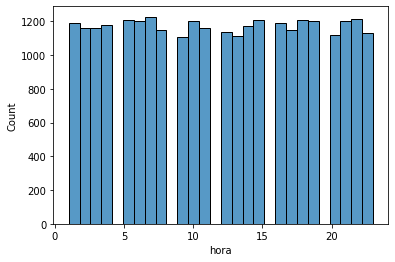

In [13]:
sns.histplot(df['hora'])

<AxesSubplot:ylabel='Count'>

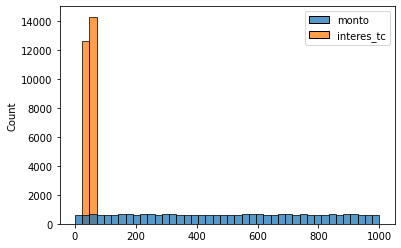

In [10]:
sns.histplot(df[(['monto','interes_tc'])])

<AxesSubplot:xlabel='dcto', ylabel='Count'>

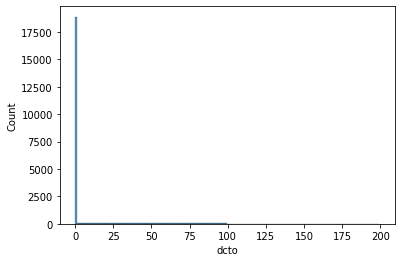

In [14]:
sns.histplot(df['dcto'])

<AxesSubplot:xlabel='cashback', ylabel='Count'>

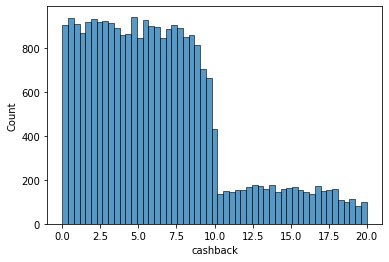

In [15]:
sns.histplot(df['cashback'])

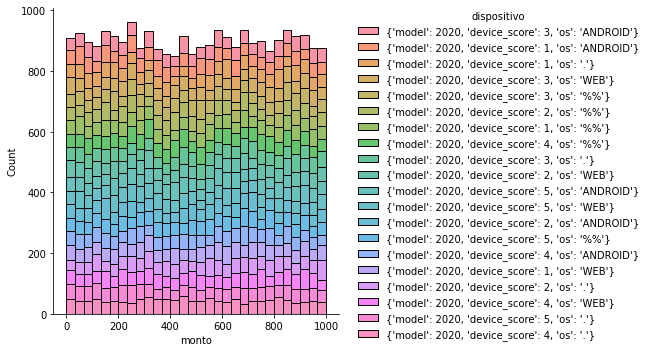

In [16]:
sns.displot(df,x='monto',hue='dispositivo',multiple='stack')

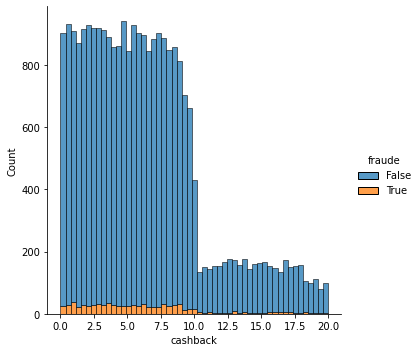

In [17]:
sns.displot(df,x='cashback',hue='fraude',multiple='stack')

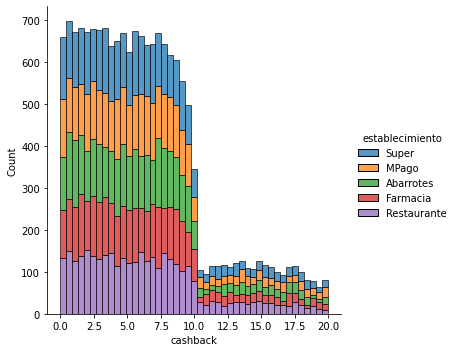

In [18]:
sns.displot(df,x='cashback',hue='establecimiento',multiple='stack')

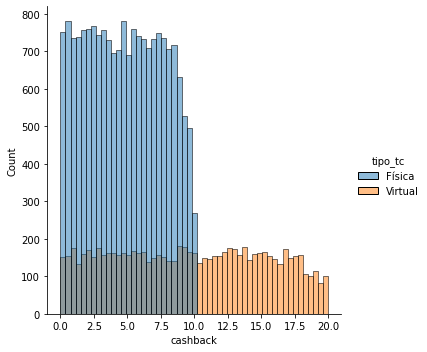

In [20]:
sns.displot(df,x='cashback',hue='tipo_tc')

<AxesSubplot:xlabel='fraude', ylabel='count'>

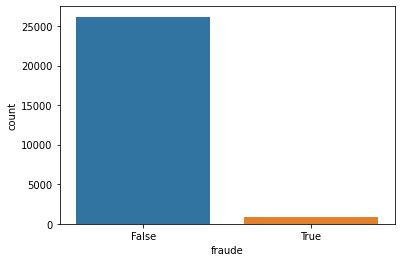

In [21]:
sns.countplot(data=df,x='fraude')

<AxesSubplot:xlabel='tipo_tc', ylabel='count'>

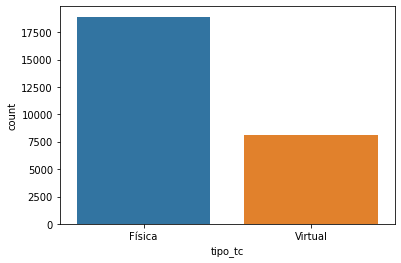

In [22]:
sns.countplot(data=df,x='tipo_tc')

<AxesSubplot:xlabel='establecimiento', ylabel='count'>

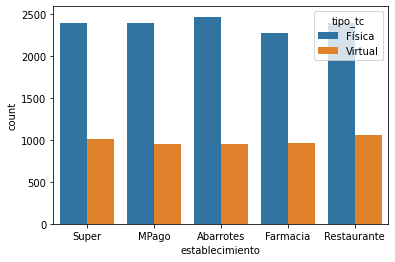

In [23]:
sns.countplot(data=df,x='establecimiento',hue='tipo_tc')

<AxesSubplot:xlabel='establecimiento', ylabel='count'>

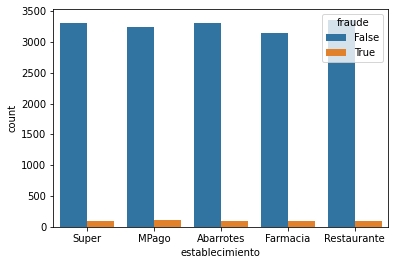

In [24]:
sns.countplot(data=df,x='establecimiento',hue='fraude')

<AxesSubplot:xlabel='ciudad', ylabel='count'>

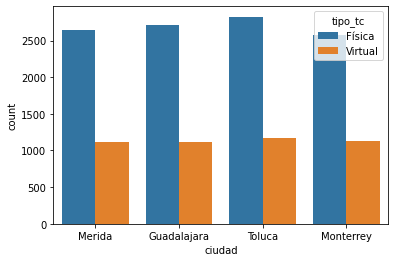

In [25]:
sns.countplot(data=df,x='ciudad',hue='tipo_tc')

In [28]:
df[(['id_user','fraude'])].groupby('fraude').size()

fraude
False    26165
True       810
dtype: int64

In [29]:
hola=df['id_user'].value_counts()

In [30]:
hola=pd.DataFrame(hola)

In [48]:
hola.head(100)

,id_user
1958,62
320,46
2845,42
1361,42
3678,40
2414,40
3662,38
3685,38
1872,38
1096,37


In [47]:
hola[hola['id_user']==50].tail(100)

,id_user


<AxesSubplot:ylabel='Count'>

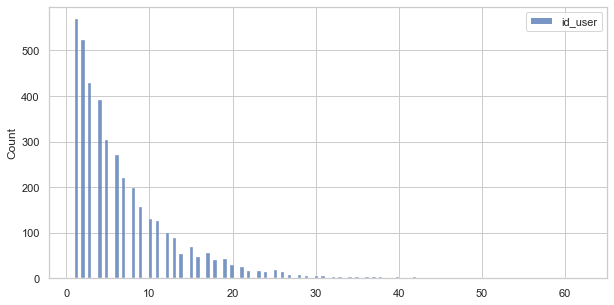

In [51]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
sns.histplot(hola,bins=150)

In [52]:
df[df['id_user']==1958].head(20)

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
13141,1958,M,379.756046,2020-01-02,11,"{'model': 2020, 'device_score': 4, 'os': 'ANDR...",Abarrotes,NaN,Física,33000,63,Aceptada,False,37.975605,3.417804,False
13142,1958,M,808.420377,2020-01-21,20,"{'model': 2020, 'device_score': 2, 'os': '.'}",Restaurante,NaN,Virtual,33000,63,Aceptada,False,80.842038,14.551567,False
13143,1958,M,902.042267,2020-01-08,21,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,NaN,Física,33000,63,Aceptada,False,0.000000,9.020423,False
13144,1958,M,43.546293,2020-01-05,1,"{'model': 2020, 'device_score': 4, 'os': 'WEB'}",Super,NaN,Física,33000,63,En proceso,False,0.000000,0.435463,False
13145,1958,M,66.095718,2020-01-05,4,"{'model': 2020, 'device_score': 5, 'os': 'WEB'}",MPago,NaN,Física,33000,63,Rechazada,False,0.000000,0.660957,False
13146,1958,M,419.469445,2020-01-10,20,"{'model': 2020, 'device_score': 2, 'os': '.'}",Abarrotes,NaN,Física,33000,63,Aceptada,False,83.893889,3.355756,False
13147,1958,M,509.847800,2020-01-09,13,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,NaN,Física,33000,63,Aceptada,False,50.984780,4.588630,False
13148,1958,M,895.286932,2020-01-12,14,"{'model': 2020, 'device_score': 3, 'os': '.'}",Super,NaN,Virtual,33000,63,Aceptada,False,0.000000,17.905739,False
13149,1958,M,300.480050,2020-01-06,3,"{'model': 2020, 'device_score': 1, 'os': 'WEB'}",MPago,NaN,Virtual,33000,63,Aceptada,False,30.048005,5.408641,False
13150,1958,M,518.351848,2020-01-24,20,"{'model': 2020, 'device_score': 2, 'os': '%%'}",Restaurante,NaN,Virtual,33000,63,Rechazada,False,51.835185,9.330333,False


In [28]:
#df['id_user'].value_counts().plot(kind='bar')

In [29]:
#sns.countplot(x='id_user',data=df)

<AxesSubplot:xlabel='ciudad', ylabel='count'>

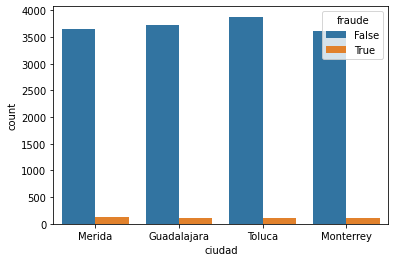

In [30]:
sns.countplot(x='ciudad',hue='fraude',data=df)

<AxesSubplot:xlabel='ciudad', ylabel='count'>

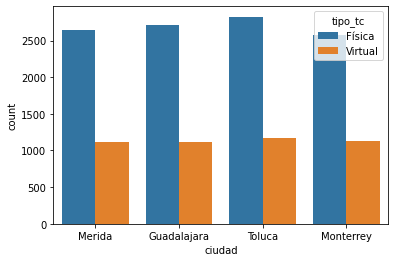

In [31]:
sns.countplot(x='ciudad',hue='tipo_tc',data=df)

<AxesSubplot:xlabel='tipo_tc', ylabel='count'>

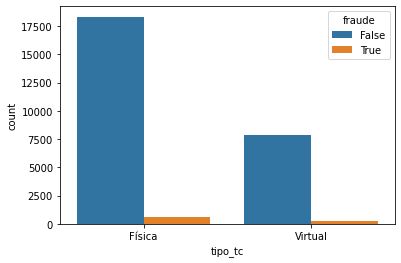

In [32]:
sns.countplot(x='tipo_tc',hue='fraude',data=df) ###########################

<AxesSubplot:xlabel='establecimiento', ylabel='count'>

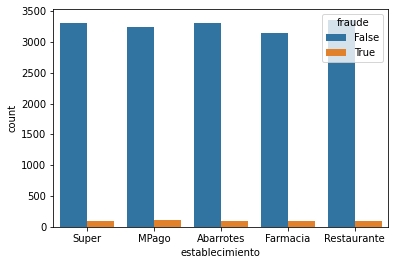

In [33]:
sns.countplot(x='establecimiento',hue='fraude',data=df)

<AxesSubplot:xlabel='fraude', ylabel='count'>

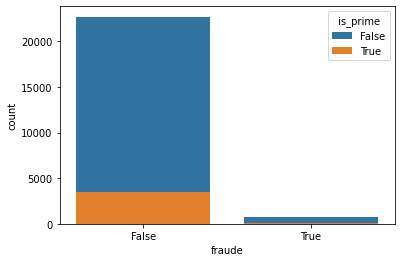

In [34]:
sns.countplot(x='fraude',hue='is_prime',data=df,dodge=False)

<AxesSubplot:xlabel='fraude', ylabel='count'>

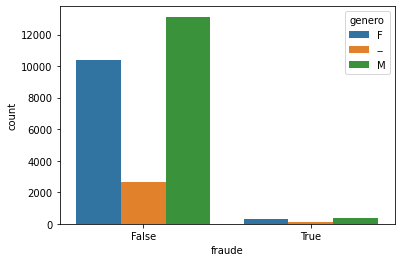

In [35]:
sns.countplot(x='fraude',hue='genero',data=df)

In [46]:
df_fraude=df[df['fraude']==True]

In [47]:
df_fraude

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
21,5,M,243.020675,2020-01-11,3,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Monterrey,Física,33000,54,Aceptada,False,0.000000,2.430207,True
26,7,--,43.721670,2020-01-04,17,"{'model': 2020, 'device_score': 1, 'os': 'WEB'}",Abarrotes,Guadalajara,Física,72000,57,Aceptada,False,0.000000,0.437217,True
37,9,F,253.327147,2020-01-14,8,"{'model': 2020, 'device_score': 1, 'os': 'WEB'}",MPago,NaN,Física,62000,45,Aceptada,False,0.000000,2.533271,True
59,14,M,19.789476,2020-01-04,16,"{'model': 2020, 'device_score': 5, 'os': 'ANDR...",NaN,Toluca,Física,67000,35,Aceptada,False,0.000000,0.197895,True
100,19,F,705.462887,2020-01-22,9,"{'model': 2020, 'device_score': 4, 'os': '.'}",NaN,NaN,Física,28000,42,Aceptada,False,70.546289,6.349166,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26854,3986,M,755.130672,2020-01-26,19,"{'model': 2020, 'device_score': 5, 'os': '.'}",NaN,Toluca,Virtual,96000,44,Aceptada,False,0.000000,15.102613,True
26884,3991,F,272.046103,2020-01-09,11,"{'model': 2020, 'device_score': 4, 'os': '%%'}",Farmacia,Toluca,Física,75000,36,En proceso,False,0.000000,2.720461,True
26937,3994,M,666.550967,2020-01-04,18,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",Restaurante,NaN,Física,59000,59,Rechazada,False,66.655097,5.998959,True
26938,3994,M,982.712607,2020-01-04,5,"{'model': 2020, 'device_score': 5, 'os': 'WEB'}",Farmacia,NaN,Física,59000,59,Rechazada,False,0.000000,9.827126,True


In [48]:
df_no_fraude=df[df['fraude']==False]

In [49]:
df_no_fraude

,id_user,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': '.'}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-01-08,13,"{'model': 2020, 'device_score': 2, 'os': 'ANDR...",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,7.461921,False
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,9.418050,False
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': '.'}",NaN,Toluca,Física,40000,56,Aceptada,False,2.418266,0.217644,False


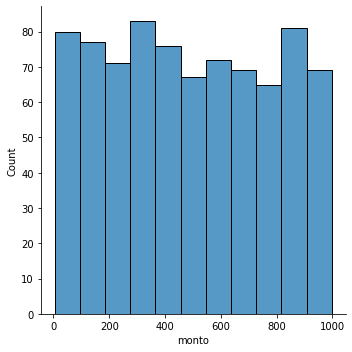

In [50]:
sns.displot(df_fraude,x='monto')

In [53]:
df_fraude['monto'].describe()

count    810.000000
mean     492.099667
std      288.871388
min        4.368924
25%      247.681469
50%      480.350852
75%      746.656307
max      997.882421
Name: monto, dtype: float64

In [58]:
df_fraude['monto'].max()

997.882420579746

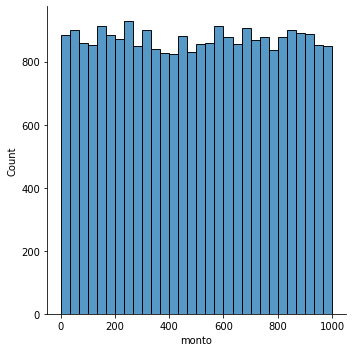

In [54]:
sns.displot(df_no_fraude,x='monto')

In [55]:
df_no_fraude['monto'].describe()

count    26165.000000
mean       499.285260
std        289.325903
min          0.017303
25%        246.520116
50%        501.114587
75%        749.615809
max        999.917764
Name: monto, dtype: float64

In [74]:
df['tipo_tc'].value_counts(normalize=True)

Física     0.70076
Virtual    0.29924
Name: tipo_tc, dtype: float64

In [75]:
df_fraude['tipo_tc'].value_counts(normalize=True)

Física     0.714815
Virtual    0.285185
Name: tipo_tc, dtype: float64

In [76]:
df_no_fraude['tipo_tc'].value_counts(normalize=True)

Física     0.700325
Virtual    0.299675
Name: tipo_tc, dtype: float64

In [78]:
df['ciudad'].value_counts(normalize=True)

Toluca         0.261293
Guadalajara    0.250572
Merida         0.245865
Monterrey      0.242270
Name: ciudad, dtype: float64

In [79]:
df_fraude['ciudad'].value_counts(normalize=True)

Merida         0.263158
Toluca         0.258772
Guadalajara    0.258772
Monterrey      0.219298
Name: ciudad, dtype: float64

In [104]:
prop1= df_no_fraude['ciudad'].value_counts(normalize=True).reset_index(name='prop')
prop2= df_fraude['ciudad'].value_counts(normalize=True).reset_index(name='prop')

In [105]:
prop1

,index,prop
0,Toluca,0.261371
1,Guadalajara,0.250320
2,Merida,0.245334
3,Monterrey,0.242976


<AxesSubplot:xlabel='index', ylabel='prop'>

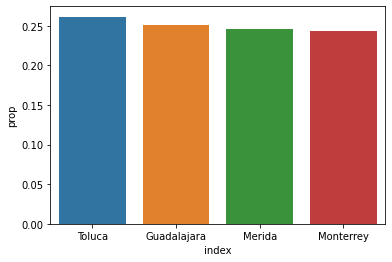

In [106]:
sns.barplot(x='index',y='prop',data=prop1) 

<AxesSubplot:xlabel='index', ylabel='prop'>

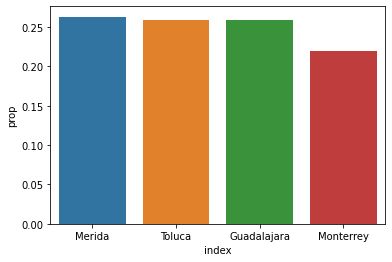

In [107]:
sns.barplot(x='index',y='prop',data=prop2) 

In [108]:
prop1= df_no_fraude['establecimiento'].value_counts(normalize=True).reset_index(name='prop')
prop2= df_fraude['establecimiento'].value_counts(normalize=True).reset_index(name='prop')

In [112]:
prop2

,index,prop
0,MPago,0.210953
1,Super,0.206897
2,Abarrotes,0.206897
3,Restaurante,0.188641
4,Farmacia,0.186613


<AxesSubplot:xlabel='index', ylabel='prop'>

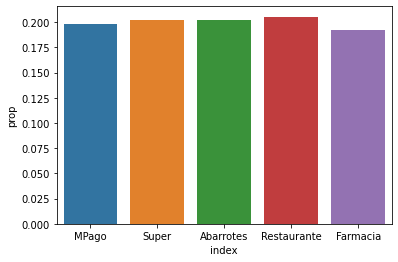

In [114]:
sns.barplot(x='index',y='prop',data=prop1,order=['MPago','Super','Abarrotes','Restaurante','Farmacia']) 

<AxesSubplot:xlabel='index', ylabel='prop'>

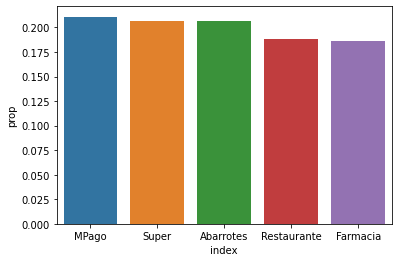

In [115]:
sns.barplot(x='index',y='prop',data=prop2,order=['MPago','Super','Abarrotes','Restaurante','Farmacia']) 

In [117]:
df['dispositivo'].value_counts()

{'model': 2020, 'device_score': 4, 'os': '%%'}         1411
{'model': 2020, 'device_score': 1, 'os': 'WEB'}        1388
{'model': 2020, 'device_score': 5, 'os': 'WEB'}        1377
{'model': 2020, 'device_score': 2, 'os': '.'}          1374
{'model': 2020, 'device_score': 5, 'os': 'ANDROID'}    1372
{'model': 2020, 'device_score': 2, 'os': '%%'}         1370
{'model': 2020, 'device_score': 2, 'os': 'WEB'}        1358
{'model': 2020, 'device_score': 3, 'os': '.'}          1355
{'model': 2020, 'device_score': 1, 'os': '%%'}         1355
{'model': 2020, 'device_score': 4, 'os': 'WEB'}        1354
{'model': 2020, 'device_score': 5, 'os': '%%'}         1348
{'model': 2020, 'device_score': 1, 'os': 'ANDROID'}    1344
{'model': 2020, 'device_score': 4, 'os': '.'}          1335
{'model': 2020, 'device_score': 4, 'os': 'ANDROID'}    1335
{'model': 2020, 'device_score': 5, 'os': '.'}          1334
{'model': 2020, 'device_score': 3, 'os': '%%'}         1324
{'model': 2020, 'device_score': 3, 'os':

In [119]:
df['id_user'].value_counts().reset_index()

,index,id_user
0,1958,62
1,320,46
2,2845,42
3,1361,42
4,3678,40
...,...,...
3995,1453,1
3996,3516,1
3997,3532,1
3998,2406,1


In [125]:
df_fraude['id_user'].value_counts().reset_index()

,index,id_user
0,1395,4
1,3913,4
2,1928,4
3,1872,4
4,3434,3
...,...,...
670,387,1
671,388,1
672,390,1
673,3049,1


In [128]:
# si dependiendo del número de transacciones por sujeto hay más fraude o no

In [54]:
#df.join((['genero','linea_tc','interes_tc','is_prime']),on='id_user')

In [55]:
suma_monto=df[(['id_user','monto','fraude'])].groupby('id_user').sum()

In [56]:
suma_monto

,monto,fraude
id_user,,
0,697.064876,0
1,3416.796066,0
2,2789.893416,0
3,477.972148,0
4,277.176524,0
...,...,...
3995,2645.347065,0
3996,1067.430567,0
3997,734.703948,0


Tenemos 4,000 clientes
- En total se tuvieron 810 transacciones de fraude
- de los cuáles fueron 675 usuarios, es decir, se repitieron los fraudes para varios usuarios.
- 16% del total de usuarios en la base, tuvieron una o más transacciones que fueron fraudulentas. 

In [224]:
675/4000

0.16875

In [57]:
fraudes_montos=suma_monto[suma_monto['fraude']>=1]

In [58]:
fraudes_montos

,monto,fraude
id_user,,
5,955.697795,1
7,2407.434522,1
9,4341.642020,1
14,5763.008250,1
19,9897.443555,1
...,...,...
3973,1689.258783,2
3980,3122.148740,1
3986,1487.443966,1


In [59]:
fraudes_montos.value_counts('fraude').reset_index(name='conteos')

,fraude,conteos
0,1,563
1,2,93
2,3,15
3,4,4


In [60]:
hola2=fraudes_montos.value_counts('fraude',normalize=True).reset_index(name='prop')

In [61]:
hola2

,fraude,prop
0,1,0.834074
1,2,0.137778
2,3,0.022222
3,4,0.005926


<AxesSubplot:xlabel='fraude', ylabel='prop'>

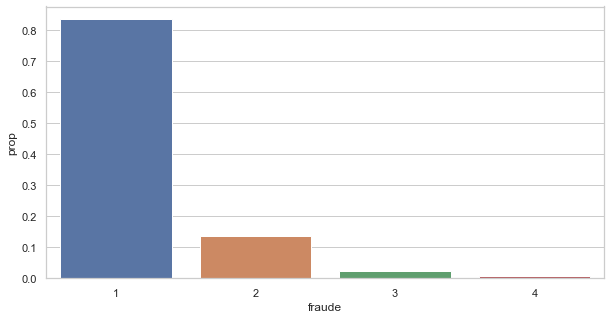

In [62]:
# Usuarios que tuvieron fraude, 1, 2, 3 o 4 veces. 
sns.barplot(x='fraude',y='prop', data=hola2)

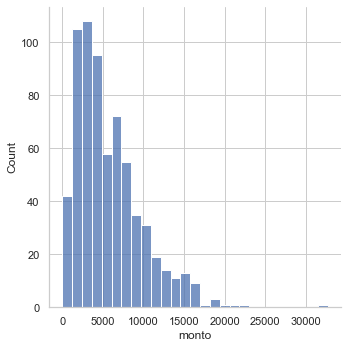

In [64]:
sns.displot(fraudes_montos,x='monto',multiple='stack')

In [65]:
no_fraudes_montos=suma_monto[suma_monto['fraude']==0]

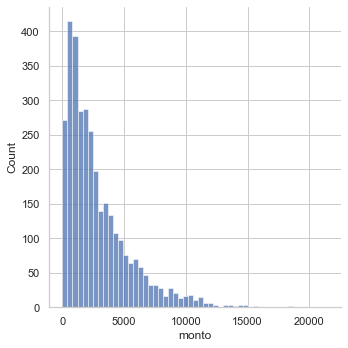

In [66]:
sns.displot(no_fraudes_montos,x='monto',multiple='stack')

<AxesSubplot:xlabel='monto', ylabel='Count'>

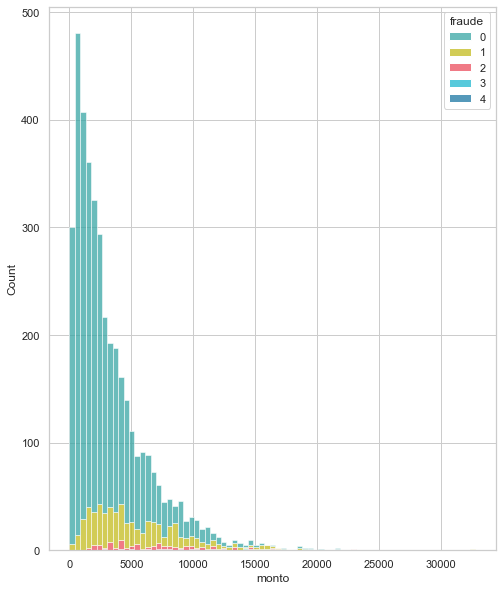

In [67]:
sns.set(style='whitegrid',rc={'figure.figsize':(8,10)})
sns.histplot(suma_monto,x='monto',hue='fraude',palette=sns.blend_palette(colores, 5),multiple="stack")

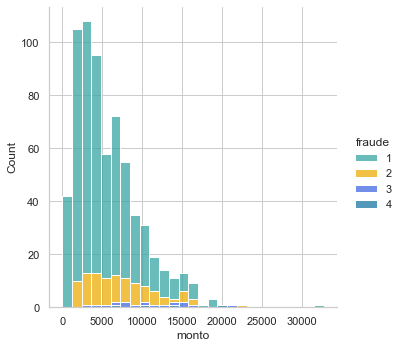

In [68]:
sns.displot(fraudes_montos,x='monto',hue='fraude',palette=sns.blend_palette(colores, 4),multiple="stack")

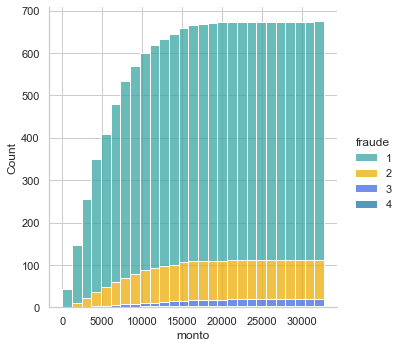

In [69]:
sns.displot(fraudes_montos,x='monto',hue='fraude',multiple='stack',common_norm=False,cumulative=True,palette=sns.blend_palette(colores, 4))

In [73]:
df['fecha']=df['fecha'].dt.date

<AxesSubplot:xlabel='hora', ylabel='fecha'>

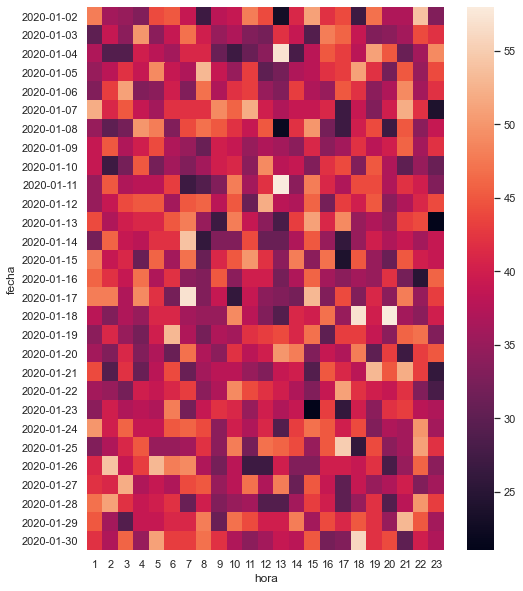

In [74]:
fra=df[df['fraude']==False]
adios=fra[(['fecha','hora'])].value_counts().reset_index(name='conteos')
adios=adios.pivot_table(index='fecha',columns='hora',values='conteos')
sns.heatmap(adios)

<AxesSubplot:xlabel='hora', ylabel='fecha'>

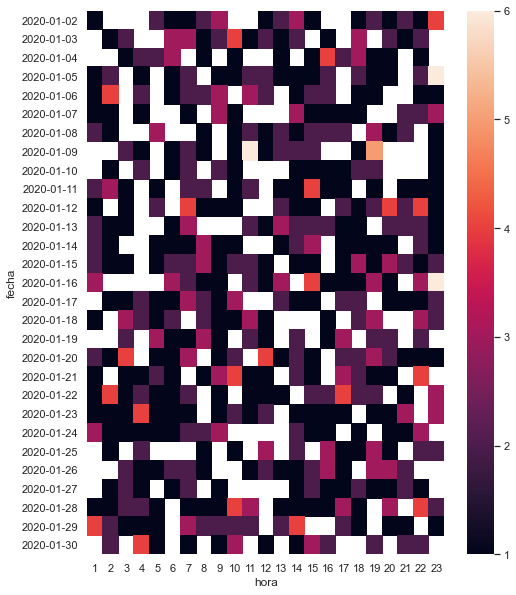

In [75]:
fra=df[df['fraude']==True]
adios=fra[(['fecha','hora'])].value_counts().reset_index(name='conteos')
adios=adios.pivot_table(index='fecha',columns='hora',values='conteos')
sns.heatmap(adios)

<AxesSubplot:xlabel='hora', ylabel='fecha'>

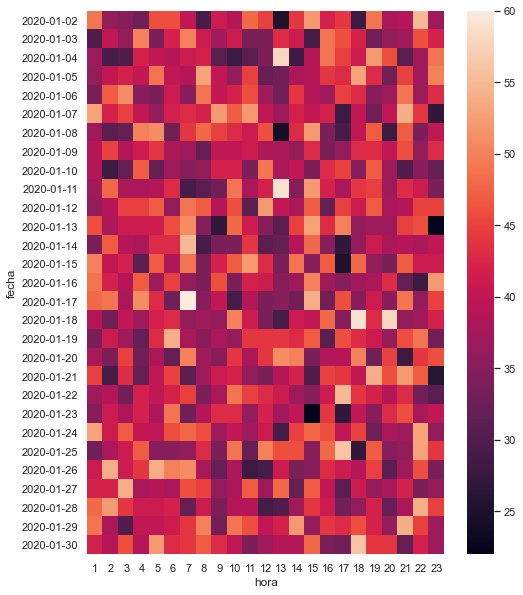

In [76]:
adios=df[(['fecha','hora'])].value_counts().reset_index(name='conteos')
adios=adios.pivot_table(index='fecha',columns='hora',values='conteos')
sns.heatmap(adios)

<AxesSubplot:xlabel='hora', ylabel='fecha'>

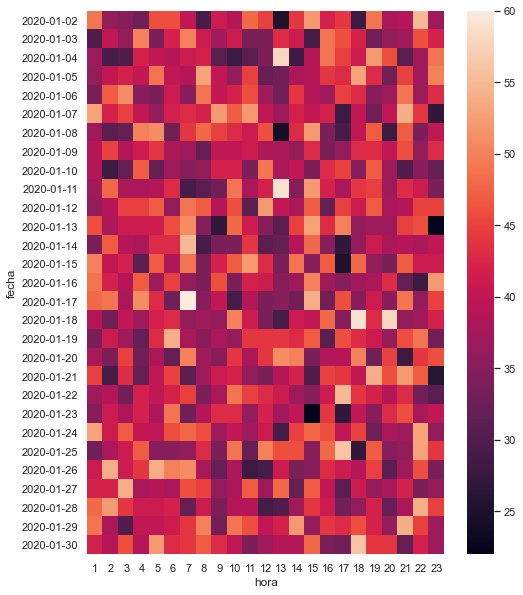

In [77]:
adios=df[(['fecha','hora'])].value_counts().reset_index(name='conteos')
adios=adios.pivot_table(index='fecha',columns='hora',values='conteos')
sns.heatmap(adios)

In [79]:
genero=df[(['id_user','genero'])].value_counts().reset_index(name='conteos')

In [80]:
genero=df[(['id_user','genero'])].value_counts().reset_index(name='conteos')

In [81]:
genero['genero'].value_counts(normalize=True)

M     0.50300
F     0.39725
--    0.09975
Name: genero, dtype: float64

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)})
fig, axs = plt.subplots(ncols=2)

a=sns.histplot(df,x='linea_tc',hue='fraude',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[0,0])
b=sns.histplot(df,x='interes_tc',hue='fraude',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[0,1])
c=sns.histplot(df,x='dcto',hue='fraude',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[1,0])
d=sns.histplot(df,x='cashback',hue='fraude',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[1,1])
plt.show()

In [ ]:
sns.set(style='whitegrid',rc={'figure.figsize':(8,7)})
a=sns.scatterplot(data=df,x='monto', y='cashback', hue='tipo_tc',
                palette=sns.blend_palette(colores, 2))

In [ ]:
a=sns.histplot(df,x='cashback',hue='fraude',multiple='stack',common_norm=False,
             palette=sns.blend_palette(colores, 2),bins=100)